# NLP machinine learning on Women's E-Commerce Clothing Reviews

Machine learning project to predict the customer recomendation for the product based in the reviews given by the customer.
We here analyse the Womens E-Commerce clothing Review data.


source - https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

Import the relavent packages for Data manipulation and visualization

In [1]:
#Import relavent python libraries
import pandas as pd  #To Import data
import numpy as np   #For Numerical analysis
import matplotlib.pyplot as plt #Data plotting and visualization
import seaborn as sns #For Data visualization

%matplotlib inline


# 1. Import Data

In [2]:
#Import Dataset

dataset = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
print(dataset.head(2))

   Unnamed: 0  Clothing ID  Age Title  \
0           0          767   33   NaN   
1           1         1080   34   NaN   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   

   Positive Feedback Count Division Name Department Name Class Name  
0                        0     Initmates        Intimate  Intimates  
1                        4       General         Dresses    Dresses  


# 2. Explore Data

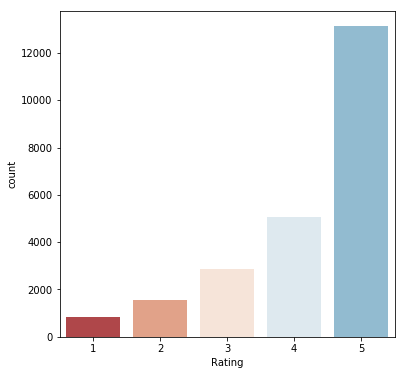

In [4]:
# Bar Chart to indicate the distribution of reviews 1-5 
plt.figure(figsize=[6,6])
sns.countplot(x = dataset['Rating'] , palette = sns.color_palette("RdBu", n_colors=6) )

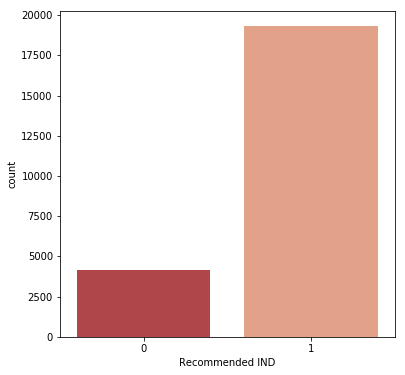

In [5]:
# Bar Chart to indicate the number of people who gave positive or negative rating
plt.figure(figsize=[6,6])
sns.countplot(x = dataset['Recommended IND'] , palette = sns.color_palette("RdBu", n_colors=6) )

We can see that the positive rating far outnumber the negative rating 

# 3. Data Processing

In [6]:
#selecting only the relavent columns for analysis
dataset = dataset[['Clothing ID', 'Title', 'Review Text', 'Recommended IND']]

In [7]:
print(dataset.shape)

print(dataset.dtypes)

print(dataset.info())

(23486, 4)
Clothing ID         int64
Title              object
Review Text        object
Recommended IND     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 4 columns):
Clothing ID        23486 non-null int64
Title              19676 non-null object
Review Text        22641 non-null object
Recommended IND    23486 non-null int64
dtypes: int64(2), object(2)
memory usage: 734.0+ KB
None


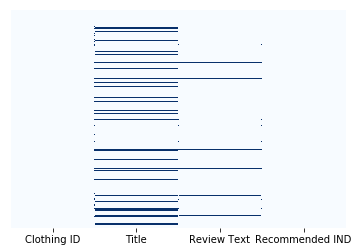

In [8]:
# Find and visualize Missing Data
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [9]:
#Drop Missing Values
dataset.isnull().count()
dataset = dataset.dropna().reset_index(drop=True)
dataset.shape

(19675, 4)

##### I felt it would be a good idea to include 'Title' also in the analysis. Thus combined Title and reviews into a single column. 

In [10]:
# Combine title and review into a single column
dataset['review'] = dataset['Title'].astype(str) + "\n" + \
                 dataset['Review Text'].astype(str)

# Inspect the new DataFrame
dataset['Review Text'].head(1)

0    I had such high hopes for this dress and reall...
Name: Review Text, dtype: object

In [11]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19675 entries, 0 to 19674
Data columns (total 5 columns):
Clothing ID        19675 non-null int64
Title              19675 non-null object
Review Text        19675 non-null object
Recommended IND    19675 non-null int64
review             19675 non-null object
dtypes: int64(2), object(3)
memory usage: 768.6+ KB
None


# 4. NLP data analysis and processing

Starting with some basic sentiment analysis by determining the Polarity per review of each review. The Polarity gives a score about how each review leans towards positive or negative.

In [12]:
# Defining a sentiment analyser function
from textblob import TextBlob
def sentiment_analyser(text):
    return text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment.polarity))

# Applying function to reviews
dataset['Polarity'] = sentiment_analyser(dataset['review'])
dataset['Polarity'].head(10)

0    0.073209
1    0.560714
2    0.512891
3    0.181111
4    0.157500
5    0.230342
6    0.002500
7    0.201814
8   -0.047435
9    0.307143
Name: Polarity, dtype: float64

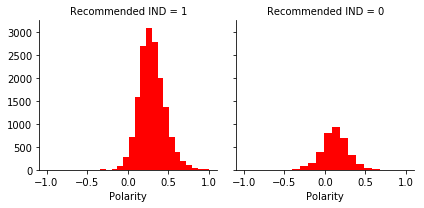

In [13]:
# Visualising polarity between recommending and non-recommending customers, then getting value counts
import seaborn as sns # Statistical data visualization
g = sns.FacetGrid(dataset, col='Recommended IND', col_order=[1, 0])
g = g.map(plt.hist, "Polarity", bins=20, color="r")

In [14]:
recommend = dataset.groupby(['Recommended IND'])
recommend['Polarity'].mean()

Recommended IND
0    0.123986
1    0.297763
Name: Polarity, dtype: float64

From the graph and mean values from above we can see that the polarity seems to be higher for Positive review. However the polarity is not much. We need to do further analysis.

### Lexicon normalization process

In [15]:
import nltk
#test to check tokenization
# Tokenize a paragraph into sentences and store in sent_tokenized
sent_tokenized = [sent for sent in nltk.sent_tokenize("""
                        I had such high hopes for this dress
                        """)]
print(sent_tokenized)
# Word Tokenize first sentence from sent_tokenized, save as words_tokenized
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]
print(words_tokenized)
# Remove tokens that do not contain any letters from words_tokenized
import re

filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]

# Display filtered words to observe words after tokenization
filtered

['\n                        I had such high hopes for this dress']
['I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress']


['I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress']

In [16]:
#test for stemming
#Import English stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
# Import the SnowballStemmer to perform stemming
from nltk.stem.snowball import SnowballStemmer

# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

# Print filtered to observe words without stemming
print("Without stemming: ", filtered)

# Stem the words from filtered and store in stemmed_words
stemmed_words = [stemmer.stem(word) for word in filtered if not word in set(stopwords.words('english'))]

# Print the stemmed_words to observe words after stemming
print("After stemming:   ", stemmed_words)

Without stemming:  ['I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress']
After stemming:    ['i', 'high', 'hope', 'dress']


[nltk_data] Downloading package stopwords to C:\Users\Arjun
[nltk_data]     Achuthan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens if not word in set(stopwords.words('english'))]
    
    return stems

words_stemmed = tokenize_and_stem("I had such high hopes for this dress")
print(words_stemmed)

['i', 'high', 'hope', 'dress']


In [18]:
# Apply the word lemmatizer function to data
dataset['Tokenized and lemmatized'] = dataset['review'].apply(tokenize_and_stem)
dataset.head()

,Clothing ID,Title,Review Text,Recommended IND,review,Polarity,Tokenized and lemmatized
0,1077,Some major design flaws,I had such high hopes for this dress and reall...,0,Some major design flaws\nI had such high hopes...,0.073209,"[some, major, design, flaw, i, high, hope, dre..."
1,1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,"My favorite buy!\nI love, love, love this jump...",0.560714,"[my, favorit, buy, i, love, love, love, jumpsu..."
2,847,Flattering shirt,This shirt is very flattering to all due to th...,1,Flattering shirt\nThis shirt is very flatterin...,0.512891,"[flatter, shirt, this, shirt, flatter, due, ad..."
3,1080,Not for the very petite,"I love tracy reese dresses, but this one is no...",0,Not for the very petite\nI love tracy reese dr...,0.181111,"[not, petit, i, love, traci, rees, dress, one,..."
4,858,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,Cagrcoal shimmer fun\nI aded this in my basket...,0.157500,"[cagrcoal, shimmer, fun, i, ade, basket, hte, ..."


### Creating bag of words

In [19]:
# Getting a count of words from the documents
# Ngram_range is set to 1,2 - meaning either single or two word combination will be extracted
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=.005, max_df=.9, ngram_range=(1,2), tokenizer=lambda doc: doc, lowercase=False , stop_words = 'english')
cv.fit(dataset['Tokenized and lemmatized'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=0.9, max_features=None, min_df=0.005,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function <lambda> at 0x000002311E067840>,
        vocabulary=None)

In [20]:

# Creating the bag-of-words representation
cv_counts = cv.transform(dataset['Tokenized and lemmatized'])

In [21]:
cv_counts.shape

(19675, 1045)

In [22]:
# Getting a view of the top 20 occurring words
occ = np.asarray(cv_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cv.get_feature_names(), 'Occurrences': occ})
counts_df.sort_values(by='Occurrences', ascending=False).head(20)

,Term,Occurrences
236,dress,12405
512,love,12269
312,fit,10884
799,size,9821
497,look,8560
561,n't,7649
994,wear,7319
473,like,7159
10,'s,7093
373,great,7083


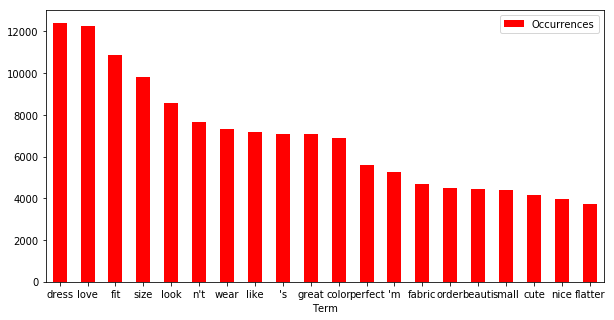

In [23]:
a=counts_df.sort_values(by='Occurrences', ascending=False).head(20)
ax = a.plot.bar(y ='Occurrences',x='Term', rot=0 , figsize = (10,5), sort_columns = False , color = 'r')

Leaving out the common adjectives. We can see that words like 'fit', 'size' , 'color' , 'fabric' , 'small' have high frequency of occurance. These mostly likely matter most for the customer. 

# TF-IDF
#### "TF-IDF stands for "Term Frequency, Inverse Document Frequency." It's a way to score the importance of words (or "terms") in a document based on how frequently they appear across multiple documents."
Intuitively…
If a word appears frequently in a document, it's important. Give the word a high score.
But if a word appears in many documents, it's not a unique identifier. Give the word a low score.
Therefore, common words like "the" and "for," which appear in many documents, will be scaled down. Words that appear frequently in a single document will be scaled up. - (source - https://stevenloria.com/tf-idf/)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# Instantiating the TfidfTransformer
transformer = TfidfTransformer()

# Fitting and transforming n-grams
transformed_weights = transformer.fit_transform(cv_counts)
transformed_weights

<19675x1045 sparse matrix of type '<class 'numpy.float64'>'
	with 481597 stored elements in Compressed Sparse Row format>

In [27]:
# Show top 20 weights
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'Term': cv.get_feature_names(), 'Weight': weights})
weights_df.sort_values(by='Weight', ascending=False).head(20)

,Term,Weight
236,dress,0.056466
512,love,0.049982
312,fit,0.043331
799,size,0.041429
497,look,0.037962
373,great,0.037689
561,n't,0.034107
10,'s,0.034017
161,color,0.033950
994,wear,0.033730


In [28]:
# Delete unwanted columns
dataset.columns

Index(['Clothing ID', 'Title', 'Review Text', 'Recommended IND', 'review',
       'Polarity', 'Tokenized and lemmatized'],
      dtype='object')

In [29]:
# Drop all columns not part of the text matrix
dataset1 = dataset.drop(['Clothing ID', 'Title', 'Review Text', 'review', 'Polarity',], axis=1)
dataset1.head(5)

,Recommended IND,Tokenized and lemmatized
0,0,"[some, major, design, flaw, i, high, hope, dre..."
1,1,"[my, favorit, buy, i, love, love, love, jumpsu..."
2,1,"[flatter, shirt, this, shirt, flatter, due, ad..."
3,0,"[not, petit, i, love, traci, rees, dress, one,..."
4,1,"[cagrcoal, shimmer, fun, i, ade, basket, hte, ..."


In [30]:
X = cv.fit_transform(dataset1['Tokenized and lemmatized']).toarray()
y = dataset1.iloc[:, 0].values
print('X-',X)
print('y-', y)

X- [[0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y- [0 1 1 ... 0 1 1]


In [31]:
yy = pd.DataFrame(X)
yy.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Machine learning Model Building

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

C:\Users\Arjun Achuthan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1. NaiveBias Classification

In [33]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Train set results
y_pred_train = classifier.predict(X_train)

AxesSubplot(0.125,0.125;0.62x0.755)


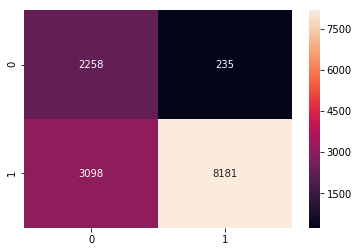

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_train, y_pred_train)
print(sns.heatmap(cm, annot=True, fmt="d"))

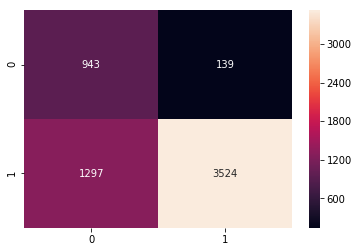

In [35]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [36]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.42      0.87      0.57      1082
          1       0.96      0.73      0.83      4821

avg / total       0.86      0.76      0.78      5903



## 2. Logistic Regression

In [37]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Train set results
y_pred_train = classifier.predict(X_train)

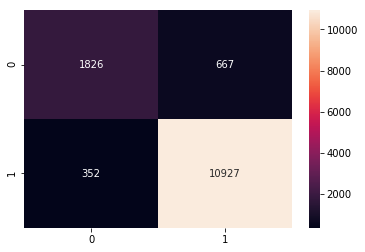

In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt="d")

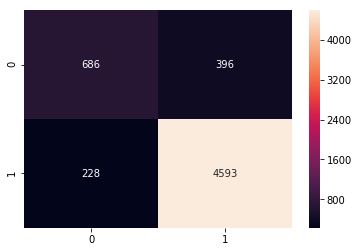

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [40]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.75      0.63      0.69      1082
          1       0.92      0.95      0.94      4821

avg / total       0.89      0.89      0.89      5903



## 3. Random Forest Classification

In [41]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Train set results
y_pred_train = classifier.predict(X_train)

C:\Users\Arjun Achuthan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


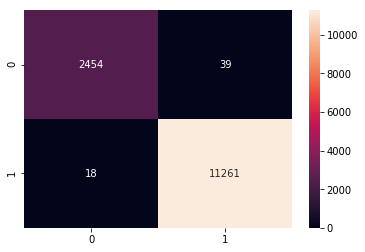

In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt="d")

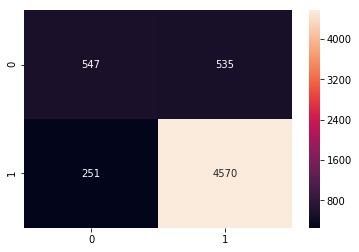

In [43]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [44]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.69      0.51      0.58      1082
          1       0.90      0.95      0.92      4821

avg / total       0.86      0.87      0.86      5903



From the above results, Logistic Regrssion seems to give better results in terms of accuracy and F1 scores. However, overall the scores for 0s are much lower than 1s. This could be because of the class imbalance. There are much more 1s than 0s in the data, this could affect the model performance. 
To resolve this we can use Oversampling or Under sampling techniques.
For our analysis we will use SMOTE oversampling technique. 

# 6. Model Improvement - SMOTE



#### We can see that 0(recoment) is far less than the majority class 1(not recument). Thus we use SMOTE sampling technique to improve the model

In [45]:
# Import the hopeful solution to our problems
from imblearn.over_sampling import SMOTE
smote=SMOTE()
# Setting up new variables for ML
X_sm, y_sm = smote.fit_sample(X,y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

## 1. SMOTE NaiveBias

In [46]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_sm, y_train_sm)

# Predicting the Train set results
y_pred_train_sm = classifier.predict(X_train_sm)


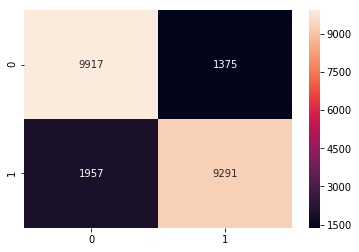

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_sm, y_pred_train_sm)
sns.heatmap(cm, annot=True, fmt="d")

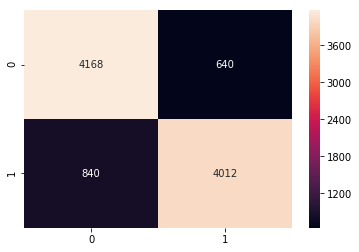

In [48]:
# Predicting the Test set results
y_pred_sm = classifier.predict(X_test_sm)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_sm, y_pred_sm)
sns.heatmap(cm, annot=True, fmt="d")

In [49]:
print(classification_report(y_test_sm,y_pred_sm))

             precision    recall  f1-score   support

          0       0.83      0.87      0.85      4808
          1       0.86      0.83      0.84      4852

avg / total       0.85      0.85      0.85      9660



## 2. SMOTE Logistic regression

In [50]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_sm, y_train_sm)

# Predicting the Train set results
y_pred_train_sm = classifier.predict(X_train_sm)

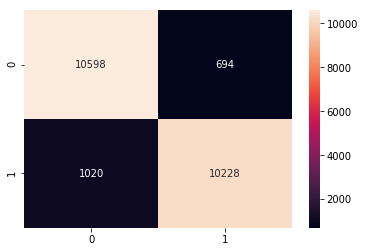

In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_sm, y_pred_train_sm)
sns.heatmap(cm, annot=True, fmt="d")

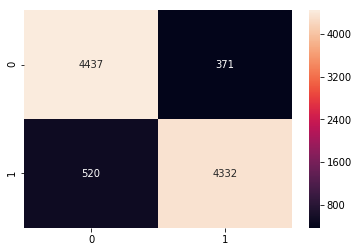

In [52]:
# Predicting the Test set results
y_pred_sm = classifier.predict(X_test_sm)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_sm, y_pred_sm)
sns.heatmap(cm, annot=True, fmt="d")

In [53]:
print(classification_report(y_test_sm,y_pred_sm))

             precision    recall  f1-score   support

          0       0.90      0.92      0.91      4808
          1       0.92      0.89      0.91      4852

avg / total       0.91      0.91      0.91      9660



## 3. SMOTE Random Forest

In [54]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

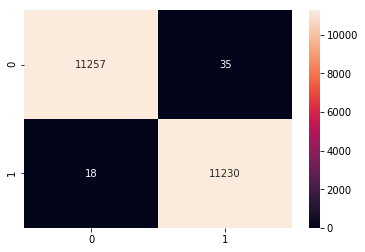

In [55]:
# Predicting the Train set results
y_pred_train_sm = classifier.predict(X_train_sm)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_sm, y_pred_train_sm)
sns.heatmap(cm, annot=True, fmt="d")

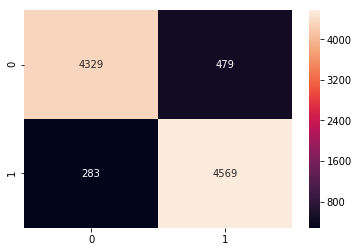

In [56]:
# Predicting the Test set results
y_pred_sm = classifier.predict(X_test_sm)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_sm, y_pred_sm)
sns.heatmap(cm, annot=True, fmt="d")

In [57]:
print(classification_report(y_test_sm,y_pred_sm))

             precision    recall  f1-score   support

          0       0.94      0.90      0.92      4808
          1       0.91      0.94      0.92      4852

avg / total       0.92      0.92      0.92      9660



Based on the results from above three models. The Random forest models seems to give the best results for the Test data. It has high accuracy for both 0s and 1s and also the F1 score is the highest.


### Thus we choose the Random Forest model





# -------------------------The End---------------------------